# <center> Temporal Series Analyzer </center>


In [ ]:
!wget -N http://archive.ics.uci.edu/ml/machine-learning-databases/00235/household_power_consumption.zip
!unzip household_power_consumption.zip

In [2]:
import pandas     as pd
import tensorflow as tf
import seaborn    as sns
import numpy      as np

from pandas import *
from tensorflow.keras import *
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing.text import *
from tensorflow.keras.utils import *
from sklearn import preprocessing

In [3]:

data = pd.read_csv("D:\\La cosa de Trabajo\\WorkSpaces\\Jupyter\\Notebook  Colab\\household_power_consumption.csv",
                   na_values= ('nan', '?'),infer_datetime_format= True, 
                   parse_dates={'dt' : ['Date', 'Time']}, sep = ';')


In [4]:
data.interpolate(method='polynomial', order=2)
data = data.set_index('dt')
data = ((data-data.min())/(data.max()-data.min()))


print (data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB
None


In [5]:
print(data.head())

                     Global_active_power  Global_reactive_power   Voltage  \
dt                                                                          
2006-12-16 17:24:00             0.374796               0.300719  0.376090   
2006-12-16 17:25:00             0.478363               0.313669  0.336995   
2006-12-16 17:26:00             0.479631               0.358273  0.326010   
2006-12-16 17:27:00             0.480898               0.361151  0.340549   
2006-12-16 17:28:00             0.325005               0.379856  0.403231   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
dt                                                                      
2006-12-16 17:24:00          0.377593             0.0          0.0125   
2006-12-16 17:25:00          0.473029             0.0          0.0125   
2006-12-16 17:26:00          0.473029             0.0          0.0250   
2006-12-16 17:27:00          0.473029             0.0          0.0125   
2006-12-16 17:28:00   

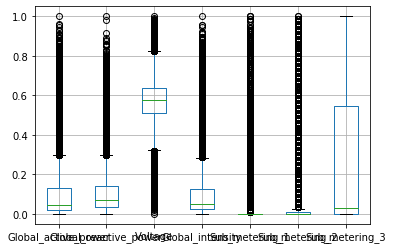

In [6]:
data.boxplot()

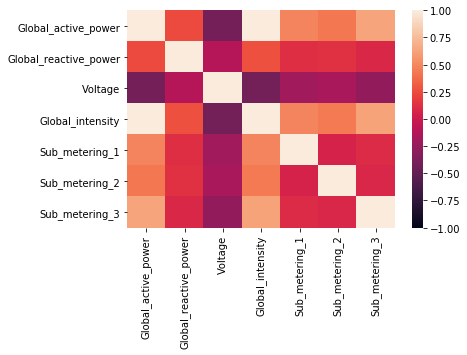

In [7]:

corr = data.corr()
sns.heatmap(corr,vmin = -1, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [8]:
print (data.info())
data.resample('M').mean().head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB
None


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-31,0.165245,0.094522,0.589374,0.162447,0.014189,0.027687,0.239018
2007-01-31,0.133083,0.095450,0.572055,0.131679,0.014366,0.022199,0.238173
2007-02-28,0.119960,0.081753,0.559593,0.118560,0.013412,0.020030,0.216244
2007-03-31,0.112496,0.082552,0.559401,0.111473,0.015470,0.029336,0.209827
2007-04-30,0.073799,0.085452,0.523426,0.075221,0.012112,0.012164,0.154850


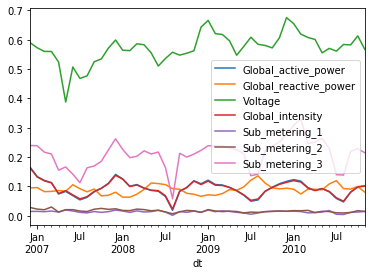

In [9]:
data.resample('M').mean().plot()

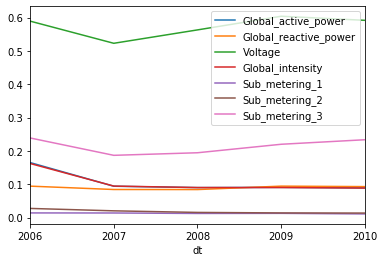

In [10]:
data.resample('Y').mean().plot()

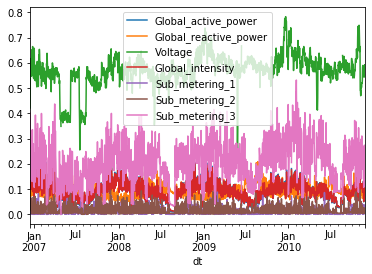

In [11]:
data.resample('D').mean().plot()

In [12]:
data = data.dropna()
data.isnull().any()


Global_active_power      False
Global_reactive_power    False
Voltage                  False
Global_intensity         False
Sub_metering_1           False
Sub_metering_2           False
Sub_metering_3           False
dtype: bool

In [13]:
def add_time_entry(arr, t, split_a, split_b, step):
    
    T = []

    for i in range(1, t):
        a = arr[split_a + (i * step) : split_b + (i * step)]
        T.append(a)

    return np.concatenate(T, axis=1)
    

In [14]:
from sklearn import preprocessing

data_train = data.drop(columns=['Global_active_power'])

data_train = data_train.values

x_train = add_time_entry(data_train, 20, 0, 600000, 1)

x_test = add_time_entry(data_train, 20, 600000, 0, -1)


x_train = preprocessing.scale(x_train)
x_test = preprocessing.scale(x_test)

x_train = x_train.reshape(600000, 19, 6)
x_test = x_test.reshape(1449280, 19, 6)


In [15]:
def transform_zero_or_one_tendence(arr):
    
    for i in range(1, arr.shape[0]):
        if arr[i - 1] < arr[i]:
            arr[i] = 1
        else:
            arr[i] = 0
    arr[0] = 0
    
    return arr

In [16]:

y_train = data.Global_active_power[0:600000].values
y_test = data.Global_active_power[600000:].values

print(y_test.shape[0])

# For predict, the future tendence
#y_test  = transform_zero_or_one_tendence(y_test)
#y_train = transform_zero_or_one_tendence(y_train)


print(y_test)

1449280
[0.01339852 0.01339852 0.01339852 ... 0.0780373  0.07767518 0.07749412]


In [17]:
model = Sequential()

model.add(tf.keras.layers.Bidirectional(LSTM(20, return_sequences=True)))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [ ]:
print(model.summary())

In [19]:

model.fit(x_train, y_train, 
          epochs=25, 
          validation_data=(x_test, y_test),
          batch_size=256)

Epoch 1/25
2344/2344 [==============================] - 33s 14ms/step - loss: 0.0135 - accuracy: 0.0000e+00 - val_loss: 0.0015 - val_accuracy: 6.9000e-06
Epoch 2/25
2344/2344 [==============================] - 32s 14ms/step - loss: 0.0011 - accuracy: 0.0000e+00 - val_loss: 0.0014 - val_accuracy: 6.9000e-06
Epoch 3/25
2344/2344 [==============================] - 32s 14ms/step - loss: 8.8782e-04 - accuracy: 0.0000e+00 - val_loss: 0.0011 - val_accuracy: 6.9000e-06
Epoch 4/25
2344/2344 [==============================] - 33s 14ms/step - loss: 8.2330e-04 - accuracy: 0.0000e+00 - val_loss: 9.7831e-04 - val_accuracy: 6.9000e-06
Epoch 5/25
2344/2344 [==============================] - 32s 14ms/step - loss: 7.8280e-04 - accuracy: 0.0000e+00 - val_loss: 0.0010 - val_accuracy: 6.9000e-06
Epoch 6/25
2344/2344 [==============================] - 33s 14ms/step - loss: 7.6371e-04 - accuracy: 0.0000e+00 - val_loss: 0.0010 - val_accuracy: 6.9000e-06
Epoch 7/25
2344/2344 [==============================] - 